In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
# Load data
data = pd.read_csv(r"C:\Users\zeroi\Desktop\Programing\Econometria\Datos\Fair1978.csv")
data_shuffled=data.sample(frac=1,random_state=44)
# Modelo Logit
Y = data_shuffled["affair"][:400]
X = data_shuffled.iloc[:400, 1:]
X = sm.add_constant(X)
logit_mod = sm.Logit(Y, X).fit(disp=False,cov_type='HC3')
#print(logit_mod.summary(),"\n")

# Modelo Probit
#probit_mod = sm.Probit(Y, X).fit(disp=False)
#print(probit_mod.summary(),"\n")


#predictions_logit = logit_mod.predict(sm.add_constant(data_shuffled.iloc[400:, 1:]))

#To do Multinominal Logit you just need to put a Y/endogenous variable that has 3,4,5,6 choices!
X = data.iloc[:400, 1:]
categorias=2
#0,1,2,3
Y = np.random.choice(categorias, len(X),p=[0.3, 0.7])
logit_mod = OrderedModel(Y, X).fit(disp=False,distr='probit')
print(logit_mod.summary())


c:\Users\zeroi\miniconda3\envs\eco\lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method nm is: xtol, ftol, maxfun. The list of unsupported keyword arguments passed include: distr. After release 0.14, this will raise.
  warnings.warn(


                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -251.14
Model:                   OrderedModel   AIC:                             516.3
Method:            Maximum Likelihood   BIC:                             544.2
Date:                Thu, 23 Nov 2023                                         
Time:                        00:13:31                                         
No. Observations:                 400                                         
Df Residuals:                     393                                         
Df Model:                           6                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0157      0.012      1.333      0.182      -0.007       0.039
years_marriage    -0.0308      0.019    

c:\Users\zeroi\miniconda3\envs\eco\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [3]:
#Multinominal Logit

#La interpretacion es basicamente Odd Ratio de cada uno de las variables. Si haces Odd Ratio te sale facil...
#No hay cuts aca
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(42)
nobs = 1000
categories = 4
X = np.random.randn(nobs, 3)  # Features
Y = np.random.choice(categories, nobs)  # Response variable

# Convert response variable to a DataFrame with dummy variables
Y_df = pd.get_dummies(Y, prefix='category')

#Todo esto es decoracion para ponerle un nombre a cada categoria, y no dejarlo como 0,1,2.
# Concatenate features and dummy variables
data = pd.concat([pd.DataFrame(X, columns=['feature1', 'feature2', 'feature3']), Y_df], axis=1)
# Fit MNLogit model
endog = data.filter(like='category')
exog = sm.add_constant(data[['feature1', 'feature2', 'feature3']])
mnlogit_mod = sm.MNLogit(endog, exog).fit()

# Display summary
print(mnlogit_mod.summary())


#print(Y)
#print(Y_df)
#print(data)


Optimization terminated successfully.
         Current function value: 1.378323
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 1000
Model:                        MNLogit   Df Residuals:                      988
Method:                           MLE   Df Model:                            9
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                0.005021
Time:                        00:13:31   Log-Likelihood:                -1378.3
converged:                       True   LL-Null:                       -1385.3
Covariance Type:            nonrobust   LLR p-value:                    0.1255
y=category_1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0885      0.091      0.971      0.331      -0.090       0.267
feature1        -0.0436

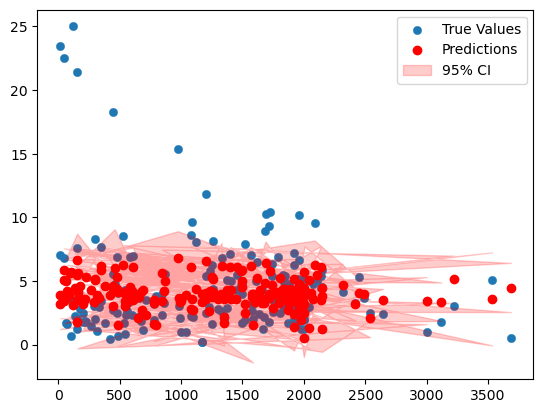

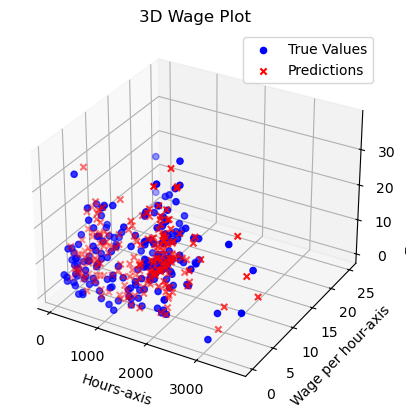

In [4]:
#Comparacion Predicciones OLS

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
#Load data
data = pd.read_csv(r"C:\Users\zeroi\Desktop\Programing\Econometria\Datos\mroz.csv")
data.head()
X=data[["kidslt6","kidsge6","age","hours","educ","motheduc","fatheduc","exper"]][:428]
X=sm.add_constant(X)
Y=data["wage"][:428]

#Separate Samples
Y_regres=Y[:230]
X_regres=X[:230]
Y_predict=Y[229:]
X_predict=X[229:]
X_graph=X_predict["hours"]
Z_graph=X_predict["exper"]
#OLS regresion
wage_model=sm.OLS(Y_regres,X_regres).fit(cov_type='HC3')
wage_model.summary()
wage_predictions=wage_model.predict(X_predict)
confidence_interval_wage=wage_model.get_prediction(X_predict).conf_int(alpha=0.01)
ci_up=confidence_interval_wage[:,1:].T
ci_down=confidence_interval_wage[:,:1].T
# Plot the true values
plt.scatter(X_graph, Y_predict, label='True Values', linewidths=0.3)
# Plot the predictions
plt.scatter(X_graph,wage_predictions,label='Predictions', color='red')

# Plot the confidence intervals
plt.fill_between(X_graph.squeeze(), *ci_down, *ci_up, color='red', alpha=0.2, label='95% CI')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_graph, Y_predict, Z_graph, c='b', marker='o', label='True Values')
ax.scatter(X_graph,wage_predictions,Z_graph,label='Predictions', color='red',marker="x")
ax.set_xlabel('Hours-axis')
ax.set_ylabel('Wage per hour-axis')
ax.set_zlabel('Experence Years-axis')
ax.set_title('3D Wage Plot')
ax.legend()
plt.show()




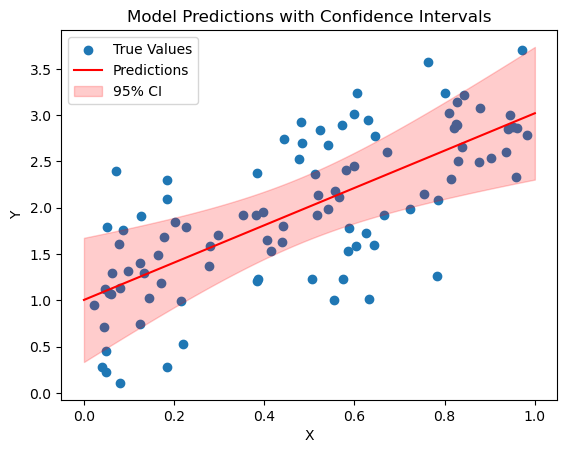

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate some example data
X = np.random.rand(100, 1)
y = 2 * X.squeeze() + 1 + 0.5 * np.random.randn(100)

# Fit a linear regression model
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant).fit()

# Generate new data for predictions
X_new = np.linspace(0, 1, 100).reshape(-1, 1)
X_new_with_constant = sm.add_constant(X_new)

# Make predictions and obtain confidence intervals
predictions = model.predict(X_new_with_constant)
S = model.get_prediction(X_new_with_constant).conf_int(alpha=0.00000001)
ci_low, ci_upp=S[:,1:].T,S[:,:1].T


plt.scatter(X, y, label='True Values')

plt.plot(X_new.squeeze(), predictions, label='Predictions', color='red')

# Plot the confidence intervals
plt.fill_between(X_new.squeeze(), ci_low.squeeze(), ci_upp.squeeze(), color='red', alpha=0.2, label='95% CI')

# Customize the plot
plt.title('Model Predictions with Confidence Intervals')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()


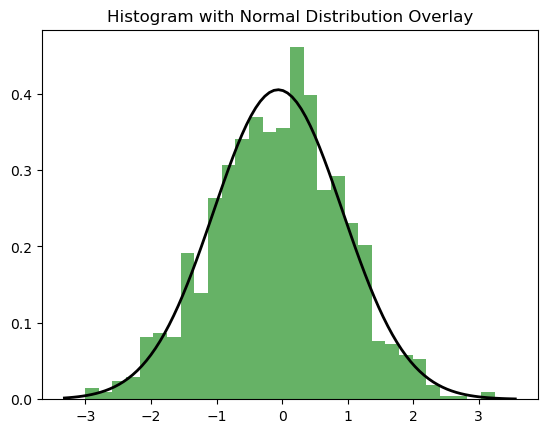

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate example data
data = np.random.normal(size=1000)

# Create histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Overlay with a normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(data), np.std(data))
plt.plot(x, p, 'k', linewidth=2)

plt.title("Histogram with Normal Distribution Overlay")
plt.show()

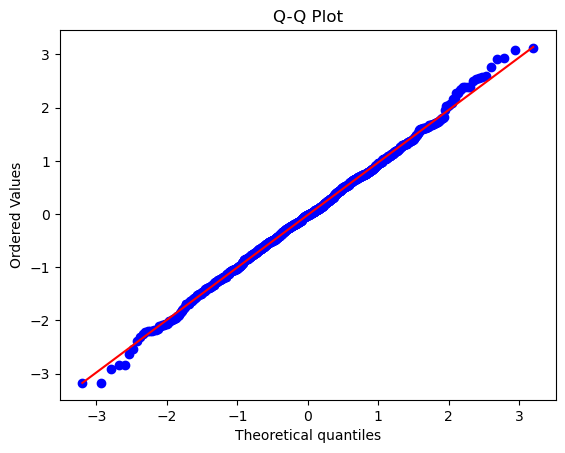

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Generate example data
data = np.random.normal(size=1000)

# Create Q-Q plot
probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


Intervalo Confianza: [19840.0592973276, 20090.06916813738]
Bootstrap Intervalo de Confianza: [19859.11038064 20070.09226728]


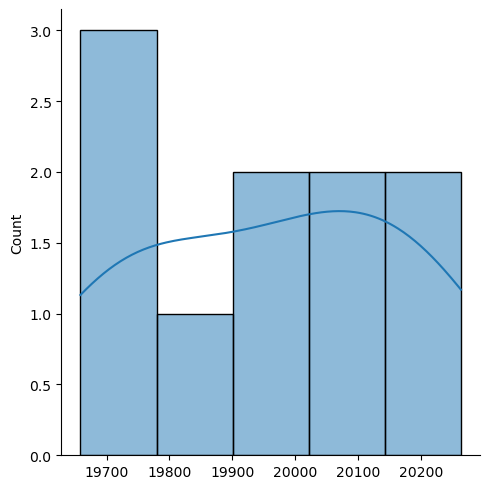

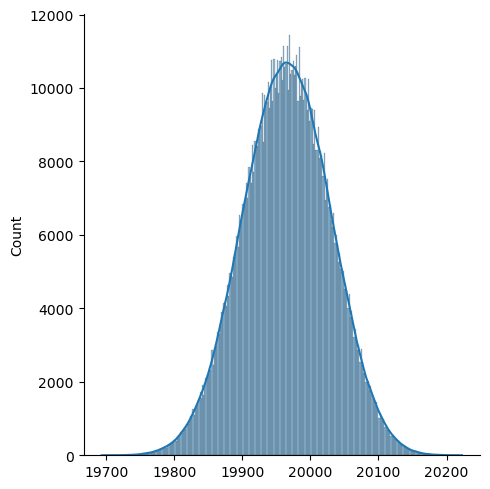

In [16]:
#Bootstrapping
from scipy.stats import bootstrap
import seaborn as sns
from numba import jit
np.random.seed(44)
data=np.random.chisquare(20000,size=10)
data_mean=np.average(data)
sns.displot(data,kde=True)
print("Intervalo Confianza:",[data_mean-1.95*np.std(data)/(len((data))**(1/2)),data_mean+1.95*np.std(data)/(len((data))**(1/2))])

# Step 2: Perform bootstrap resampling
num_resamples = 1000000  # You can choose the number of resamples
bootstrap_samples = np.random.choice(data, size=(num_resamples, len(data)), replace=True)
# Step 3: Calculate the statistic of interest for each bootstrap sample
bootstrap_statistics = np.mean(bootstrap_samples, axis=1)  # Example: mean as the statistic of interest

sns.displot(bootstrap_statistics,kde=True)

# Step 4: Analyze the distribution of the bootstrap statistics
# For example, you can calculate confidence intervals or plot a histogram.

# Example: Calculate a 95% confidence interval
confidence_interval = np.percentile(bootstrap_statistics, [5, 95])

print("Bootstrap Intervalo de Confianza:", confidence_interval)